In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib --list

Available matplotlib backends: ['inline', 'ps', 'qt4', 'gtk', 'svg', 'tk', 'notebook', 'nbagg', 'gtk3', 'qt', 'pdf', 'wx', 'agg', 'widget', 'ipympl', 'osx', 'qt5']


### File opening

In [2]:
import scripts.file_manager as fm
import scripts.file_viewer as fv
dir = "features"
files = fm.get_files(dir=dir)
dataset = {}
for file in files :
    emb = int(file.split('emb')[1].split('.')[0])
    dataset[emb]=pd.read_csv("data/"+dir+"/"+file)

### Data cleaning and enhancement

In [3]:
def f(row):
    try:
        if row["cell"]==0:
            val = False
        else :
            val = True
        return val
    except Exception as e:
        print("Fail for cell analysis")
        print(row.index)
        raise e

#Clean outlyer & Enrigh data
for i, emb in dataset.items():
    emb = emb.set_index("id").drop(["Unnamed: 0"], axis=1)
    emb['is_in_cell'] = emb.apply(f, axis=1)
    dataset[i] = emb
    print("embryo {} : OK".format(i))
    

embryo 8 : OK
embryo 1 : OK
embryo 10 : OK
embryo 7 : OK


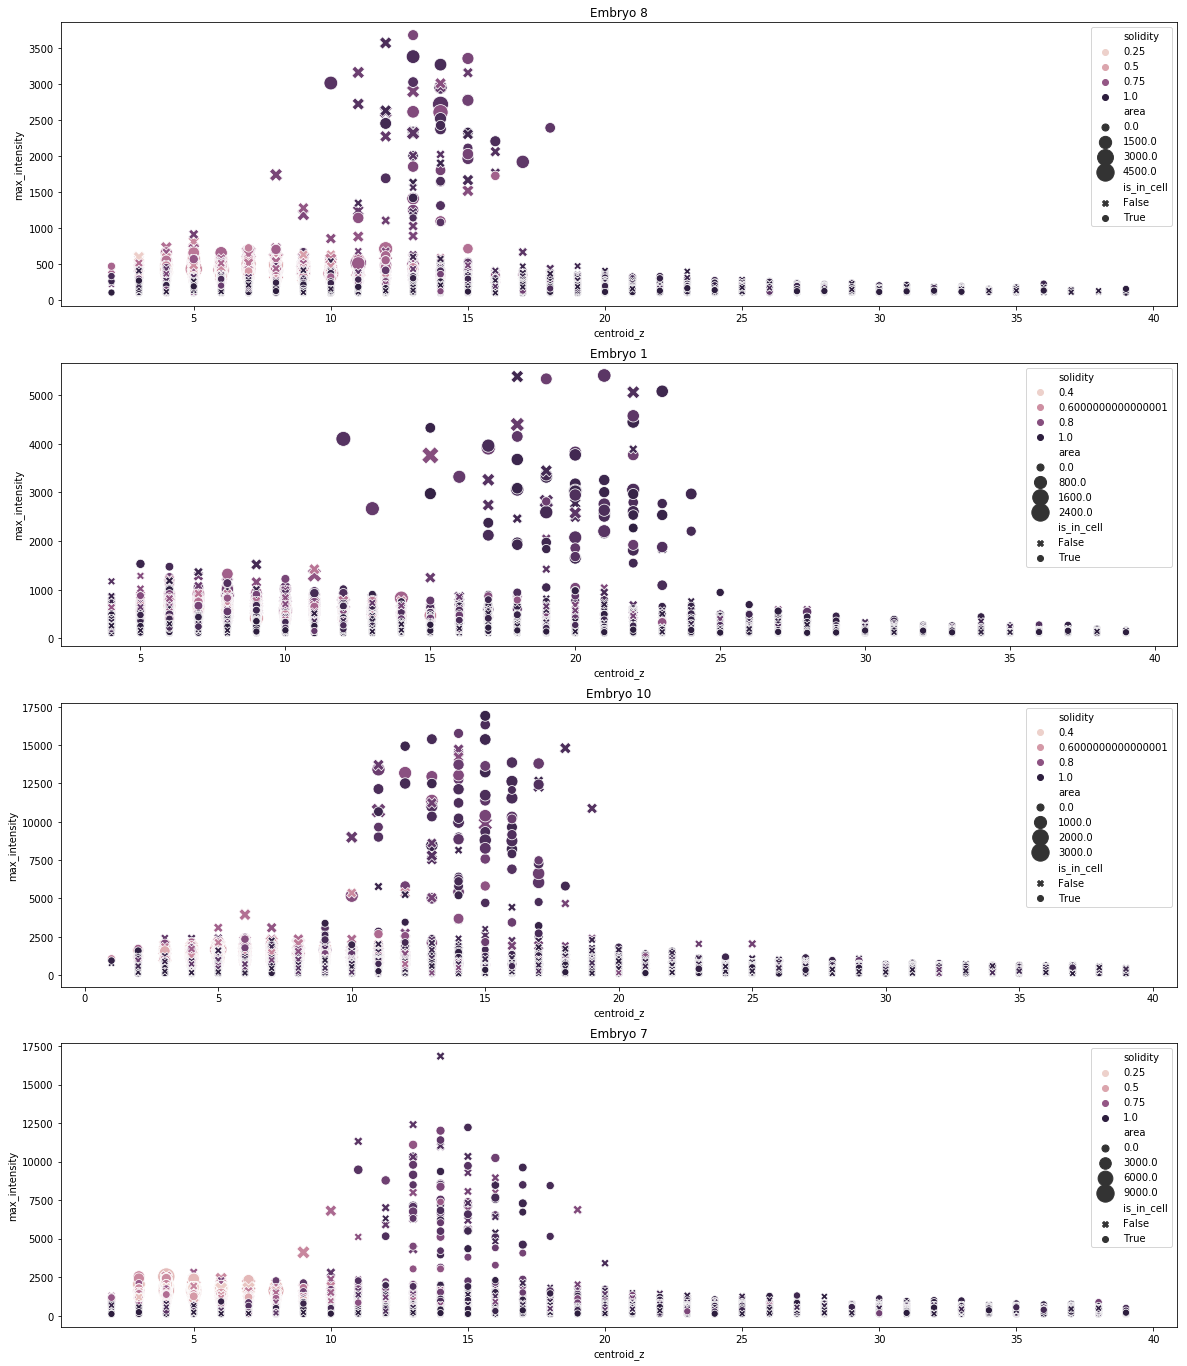

In [32]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,6*len(dataset)])
ax_i = 0
for i, emb in dataset.items():
    if len(dataset) > 1:
        sns.scatterplot(hue="solidity",x='centroid_z', y="max_intensity", size="area", data=emb, sizes=(50,300), style="is_in_cell",markers=["X","o"], ax=axs[ax_i]).set_title("Embryo {}".format(i))
        ax_i+=1
    else:
        sns.scatterplot(hue="solidity",x='centroid_z', y="max_intensity",size="area",sizes=(50,300), data=emb,style="is_in_cell",markers=["X","o"], ax=axs).set_title("Embryo {}".format(i))


In [ ]:
for i, emb in dataset.items():
    f = plt.figure(figsize=(8, 6))
    sns.heatmap(emb.corr(), annot=True).set_title('Correlation Matrix of embryo {}'.format(i), fontsize=14);
    plt.xticks(range(emb.shape[1]), emb.columns, fontsize=11, rotation=45)
    plt.yticks(range(emb.shape[1]), emb.columns, fontsize=11)
    plt.show()

In [ ]:
#avg_z_dataset = {}
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,5*len(dataset)])

ax_i = 0
for i, emb in dataset.items():
    if len(dataset) > 1:
        sns.lineplot(x="centroid_z",y="max_intensity",data=emb,ax=axs[ax_i])
        sns.lineplot(x="centroid_z",y="min_intensity",data=emb,ax=axs[ax_i])
        sns.lineplot(x="centroid_z",y="mean_intensity",data=emb,ax=axs[ax_i]).set_title("Embryo {}".format(i))
        ax_i+=1
    else:
        sns.lineplot(x="centroid_z",y="max_intensity",data=emb,ax=axs)
        sns.lineplot(x="centroid_z",y="min_intensity",data=emb,ax=axs)
        sns.lineplot(x="centroid_z",y="mean_intensity",data=emb,ax=axs).set_title("Embryo {}".format(i))


# ne retenir que l'extent sup à ...


In [ ]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,5*len(dataset)])
ax_i=0
for i, emb in dataset.items():
    if len(dataset) > 1:
        sns.lineplot(x="centroid_z", y="depth",data=emb, ax=axs[ax_i]).set_title("Embryo {}".format(i))
        ax_i+=1
    else:
        sns.lineplot(x="centroid_z", y="depth",data=emb, ax=axs).set_title("Embryo {}".format(i))
    #sns.lineplot(x="centroid_z",y="depth",data=emb, ax =ax)


### Variance

In [ ]:
var_z_dataset={}
for i, df in dataset.items():
    var_z= df.groupby('centroid_z').var()
    var_z_dataset[i]=var_z
    var_int = var_z.drop(["total_intensity", "area","centroid_x","centroid_y", "depth", "extent"], axis=1).reset_index()
    #var_int.plot(figsize=(15, 5), title="Embryo {} intensities".format(i))
    var_int.plot(figsize=(15, 5), title="Embryo {} intensities".format(i))

### Solidity

In [ ]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,5*len(dataset)])
ax_i=0
for i, emb in dataset.items():
    if len(dataset) > 1:
        sns.scatterplot(hue="mean_intensity",x='centroid_z', y="solidity",size="area",sizes=(50,300), data=emb, ax=axs[ax_i]).set_title("Embryo {}".format(i))
        min_z = emb.groupby('centroid_z').min().reset_index()
        sns.lineplot(x="centroid_z",y="solidity", data=min_z, ax=axs[ax_i])
        ax_i+=1
    else:
        sns.scatterplot(hue="mean_intensity",x='centroid_z', y="solidity",size="area",sizes=(50,300), data=emb, ax=axs[ax_i]).set_title("Embryo {}".format(i))
        min_z = emb.groupby('centroid_z').min().reset_index()
        sns.lineplot(x="centroid_z",y="solidity", data=min_z, ax=axs[ax_i])
#sns.scatterplot(hue="mean_intensity",x='centroid_z', y="extent",size="area",sizes=(50,300), data=emb1bis, ax=axs[1]).set_title("Embryo {}".format(i))

### Amount of region detected

In [ ]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,5*len(dataset)])
ax_i=0
for i, emb in dataset.items():
    count = emb.groupby('centroid_z').count()['area']
    if len(dataset) > 1:
        ax=axs[ax_i]
        sns.countplot(x="centroid_z", data=emb, ax=ax).set_title("Embryo {}".format(i))
        for p, label in zip(ax.patches, count):
            ax.annotate(label, (p.get_x()+0.15, p.get_height()+20))
        ax_i+=1
    else:
        ax = axs
        sns.countplot(x="centroid_z", data=emb, ax=ax).set_title("Embryo {}".format(i))
        for p, label in zip(ax.patches, count):
            ax.annotate(label, (p.get_x()+0.15, p.get_height()+20))

In [ ]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,5*len(dataset)])
ax_i=0
for i, emb in dataset.items():
    if len(dataset) > 1:
        sns.scatterplot(hue="mean_intensity",x='solidity', y="max_intensity",size="total_intensity",sizes=(50,300), style="is_in_cell",markers=["X","o"], data=emb, ax=axs[ax_i]).set_title("Embryo {}".format(i))
        ax_i+=1
    else:
        sns.scatterplot(hue="mean_intensity",x='solidity', y="max_intensity",size="total_intensity",sizes=(50,300), style="is_in_cell",markers=["X","o"], data=emb, ax=axs).set_title("Embryo {}".format(i))

In [ ]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,5*len(dataset)])
ax_i=0
for i, emb in dataset.items():
    sns.scatterplot(hue="solidity",x='max_intensity', y="area",size="area",sizes=(50,300), style="is_in_cell",markers=["X","o"], data=emb, ax=axs[ax_i]).set_title("Embryo {}".format(i))
    ax_i+=1


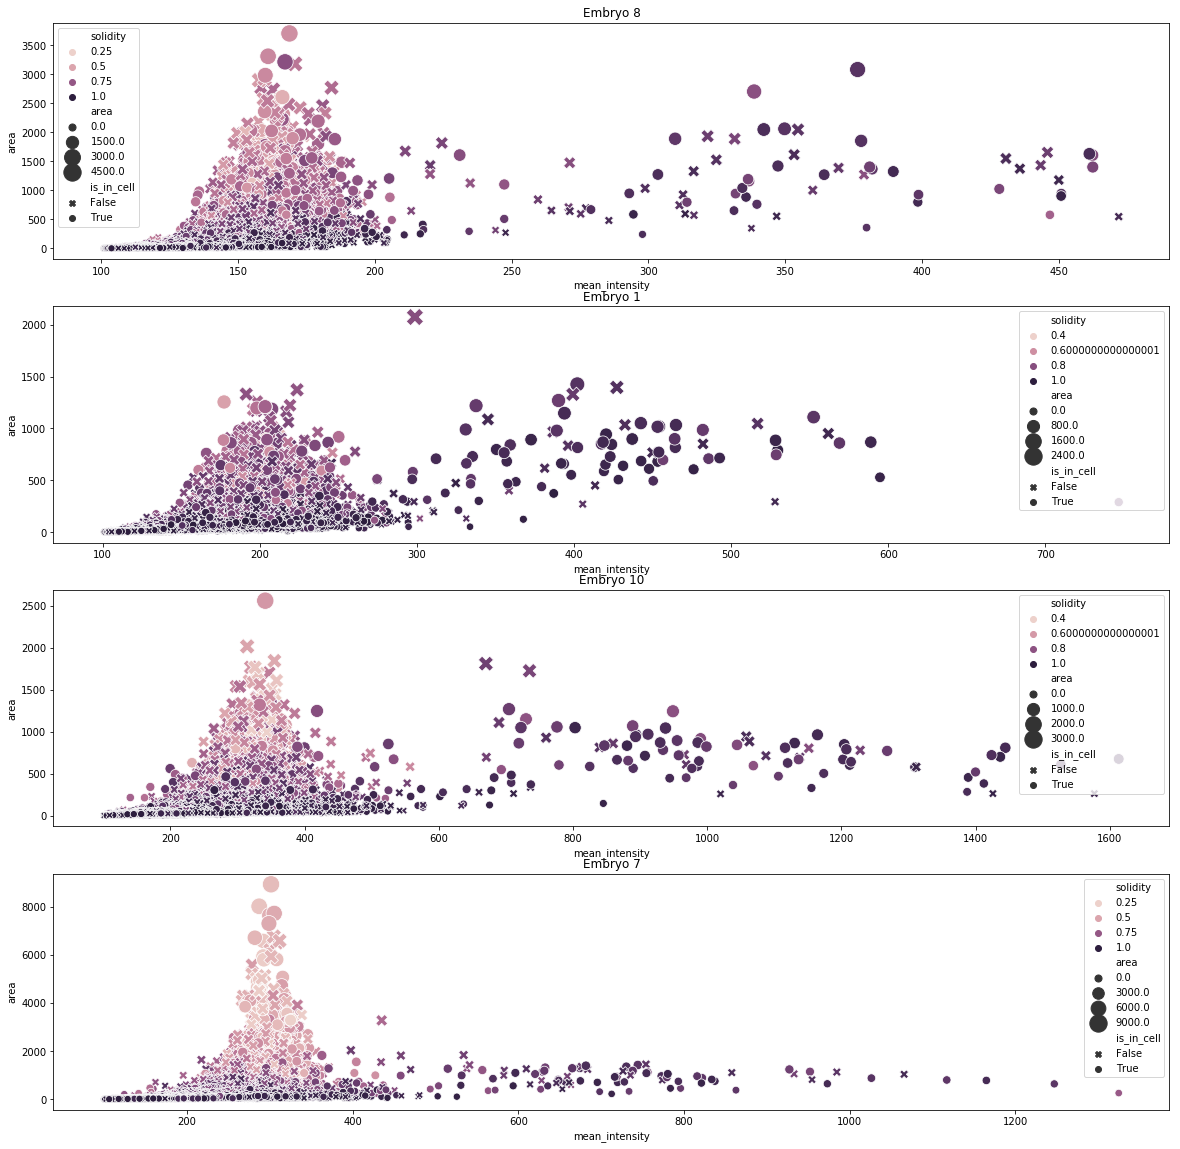

In [10]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,5*len(dataset)])
ax_i=0
for i, emb in dataset.items():
    sns.scatterplot(hue="solidity",x='mean_intensity', y="area",size="area",sizes=(50,300), style="is_in_cell",markers=["X","o"], data=emb, ax=axs[ax_i]).set_title("Embryo {}".format(i))
    ax_i+=1


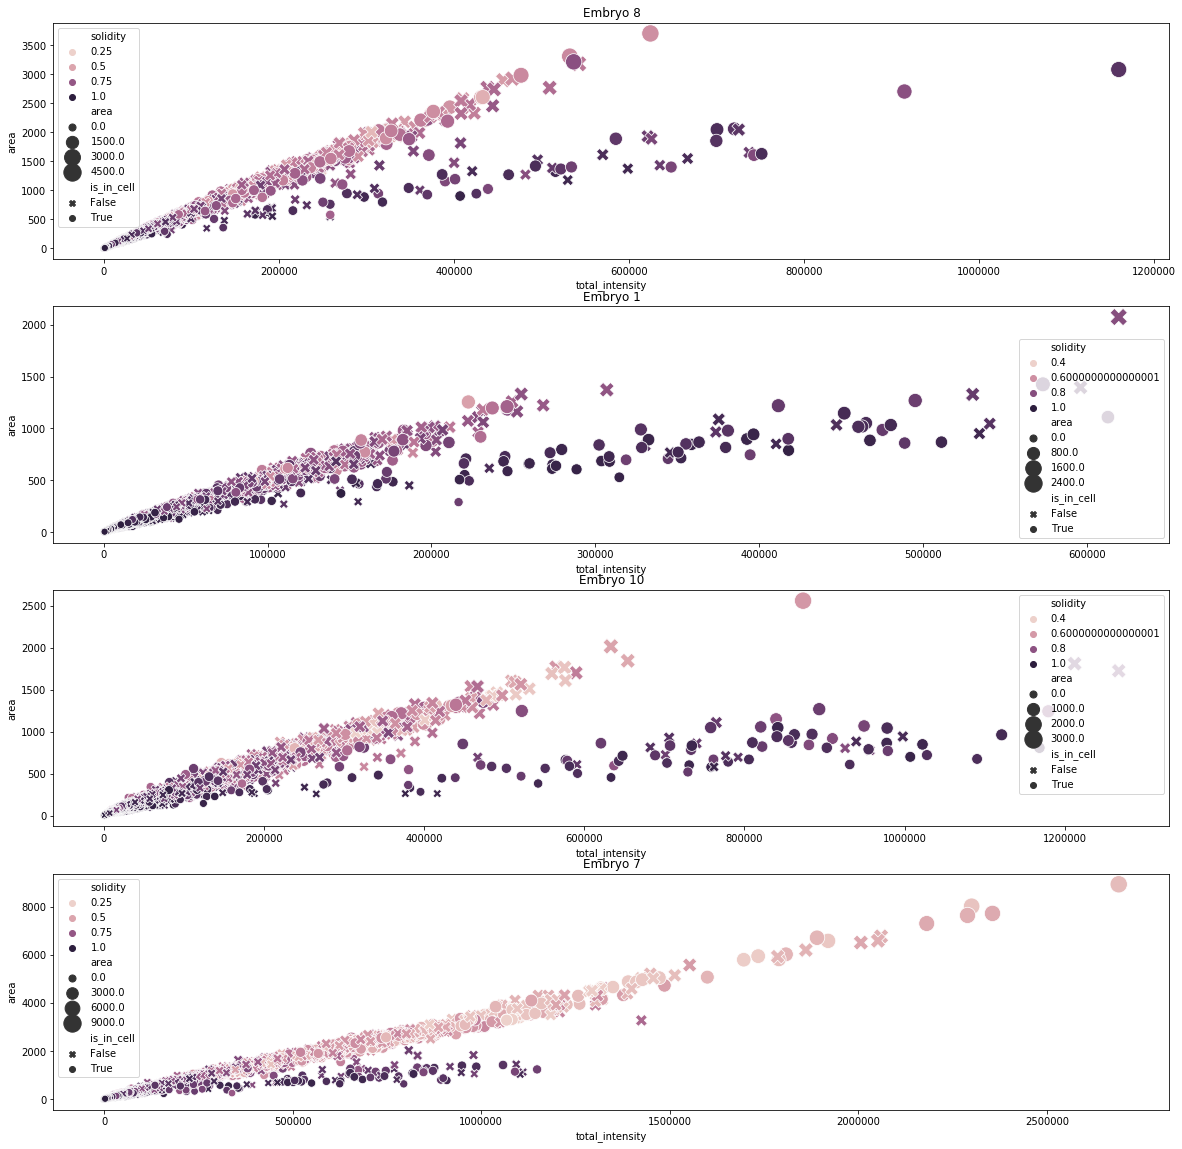

In [11]:
fig, axs = plt.subplots(len(dataset), 1, figsize=[20,5*len(dataset)])
ax_i=0
for i, emb in dataset.items():
    sns.scatterplot(hue="solidity",x='total_intensity', y="area",size="area",sizes=(50,300), style="is_in_cell",markers=["X","o"], data=emb, ax=axs[ax_i]).set_title("Embryo {}".format(i))
    ax_i+=1


# Classification

In [9]:
from scripts.classifiers import kmeans_classification, birch_classification
res_clf = {}
for i, emb in dataset.items():
    #emb=emb[['area','total_intensity']]
    # Principal components analysis
    from sklearn.decomposition import PCA
    pca = PCA()
    emb_pca = pca.fit_transform(emb)

    # Classifier
    k_means, labels_k = kmeans_classification(emb_pca)
    birch, labels_b = birch_classification(emb_pca)
    res_clf[i]= pd.concat([pd.DataFrame(emb), pd.Series(labels_k),pd.Series(labels_b)], axis=1)
    print(res_clf[i].shape)
    

(15969, 15)
(22094, 15)
(20585, 15)
(20454, 15)


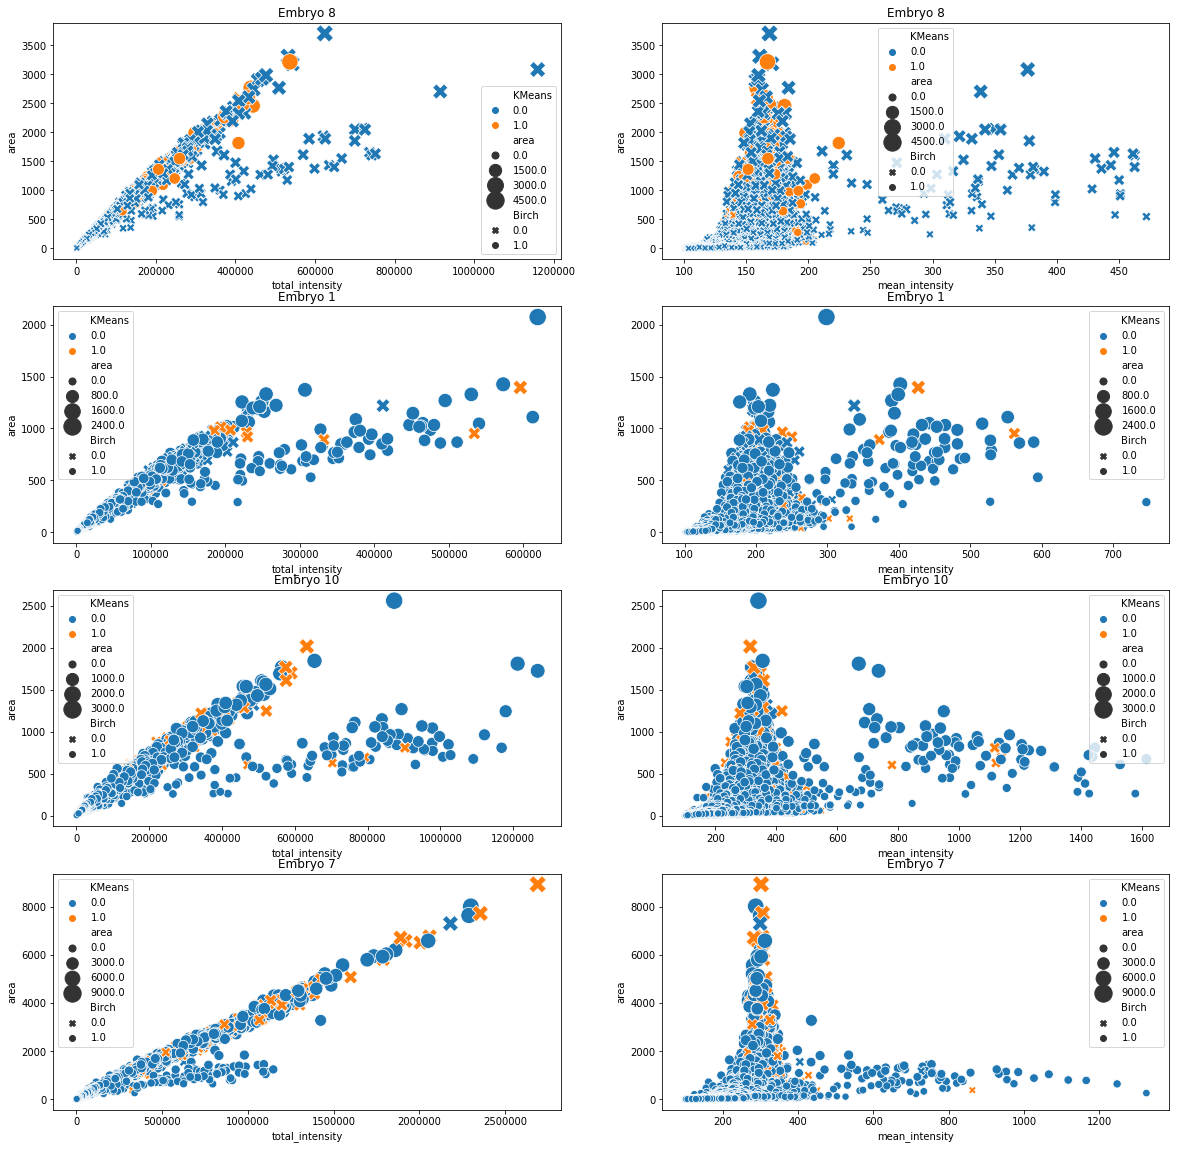

In [12]:
fig, axs = plt.subplots(len(dataset), 2, figsize=[20,5*len(dataset)])
ax_i=0
for i, emb in res_clf.items():
    sns.scatterplot(hue="KMeans",x='total_intensity', y="area",size="area",sizes=(50,300), data=emb, style="Birch",markers=["X","o"], ax=axs[ax_i][0]).set_title("Embryo {}".format(i))
    sns.scatterplot(hue="KMeans",x='mean_intensity', y="area",size="area",sizes=(50,300), style="Birch",markers=["X","o"], data=emb, ax=axs[ax_i][1]).set_title("Embryo {}".format(i))
    ax_i+=1


In [ ]:
from sklearn.mixture import BayesianGaussianMixture
import time
X = dataset[1][['area','total_intensity']]

cov_types = ['full', 'tied', 'diag', 'spherical']
i_par= ['kmeans', 'random']
wcpt = ['dirichlet_process','dirichlet_distribution']

fig, axs = plt.subplots(64, 1, figsize=[20,5*64])
i=0
t = time.time()
for ct in cov_types :
    for i_p in i_par :
        for wcp in wcpt:
            for c in [0.1, 1, 10, 100]:
                bgm = BayesianGaussianMixture(n_components=2,weight_concentration_prior = c, covariance_type = ct, n_init=10, init_params=i_p, weight_concentration_prior_type=wcp)
                labels = bgm.fit_predict(X)
                labels = pd.Series(labels, name="Bayes_Gauss_Mix")
                res= pd.concat([X, labels], axis=1)
                sns.scatterplot(hue="Bayes_Gauss_Mix",x='total_intensity', y="area",size="area",sizes=(50,300), data=res, style="Bayes_Gauss_Mix",markers=["X","o"], ax = axs[i]).set_title("{} / {} / {} : {}".format(ct, i_p, wcp, c))
                t = time.time() - t
                i+=1
                print("{}s: {} / {} / {} : {} : DONE".format(t, ct, i_p, wcp, c) )


In [ ]:
from scripts.multimodel_clusterer import get_isolated_permutations
from sklearn.mixture import GaussianMixture

n_components =[2,3,5]
covariance_type=['full', 'tied', 'diag', 'spherical'] 
tol=[0.00001,0.001,0.1]
reg_covar=[1e-6, 1e-8, 1e-3]
max_iter=[100,1000,10]
n_init=[1,10,100]
init_params=['kmeans', 'random']
random_state=[None,0]
warm_start=[True, False]

X = dataset[1][['area','total_intensity']]


params = [n_components, covariance_type, tol, reg_covar, max_iter, n_init, init_params, random_state, warm_start]

amount = 1
for lst in params:
    amount+=len(lst)
    
print(" {} tests to run".format(amount))

params = get_isolated_permutations(params)

fig, axs = plt.subplots(amount, 1, figsize=[20,5*amount])
i=0
res= X.copy()
for name, [n_components, covariance_type, tol, reg_covar, max_iter, n_init, init_params, random_state, warm_start] in params.items():
    try:
        #name = "n_components {} / covariance_type {} / tol {} / reg_covar {} / max_iter {} / n_init {} / init_params {} / random_state {} / warm_start {}".format(n_components, covariance_type, tol, reg_covar, max_iter, n_init, init_params, random_state, warm_start)
        print(name)
        bgm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, tol=tol, reg_covar=reg_covar, max_iter=max_iter, n_init=n_init, init_params=init_params, weights_init=None, means_init=None, precisions_init=None, random_state=random_state, warm_start=warm_start)
        labels = bgm.fit_predict(X)
        labels = pd.Series(labels, name=name)
        res= pd.concat([res, labels], axis=1)
        sns.scatterplot(hue=labels,x='total_intensity', y="area",size="area",sizes=(50,300), data=res, ax = axs[i]).set_title(name)
    except :
        print("issue with ".format(name))
    finally:
        i+=1
res.to_csv("test_gaussian_mix.csv")

 26 tests to run
0.1
1
2
3


C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\mixture\base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


100
issue with 
5


C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\mixture\base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


0


C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Antoine\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with inp

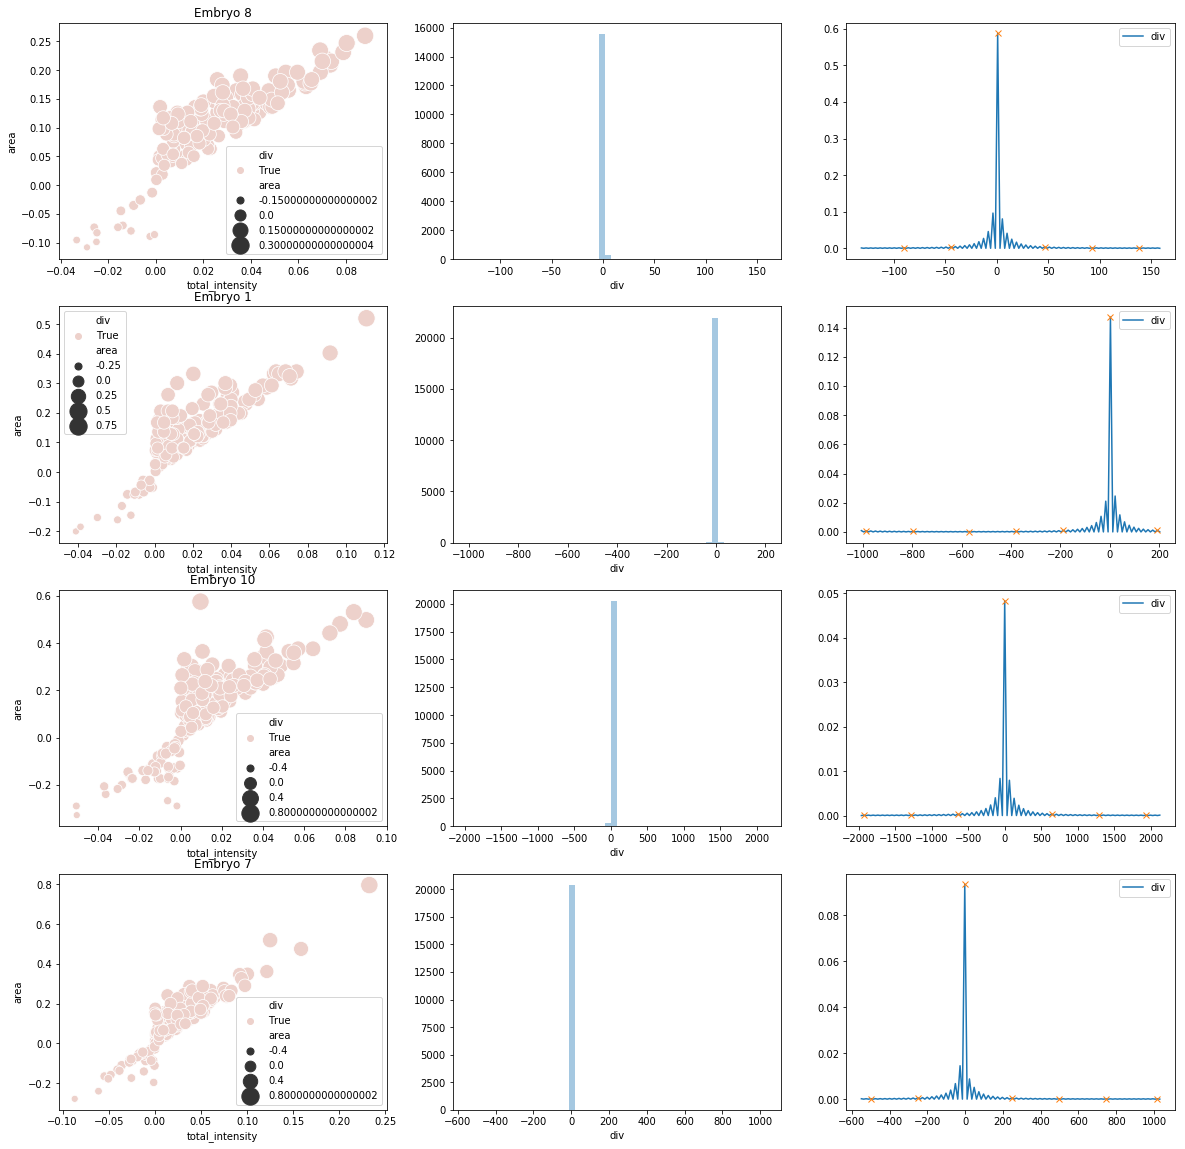

In [35]:
from scipy.signal import find_peaks
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

fig, ax = plt.subplots(4, 3, figsize=[20,20])
i=0
for emb, ds in dataset.items():
    #Get values
    #X = ds[['area','total_intensity']]
    X=ds
    
    X.index.map(int)
    
    X_plt = X.copy()
    #Normalize and center data
    X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
    
    
    # Compute div ratio
    div = X['area']/X['total_intensity']
    div.name ="div"

    # Get the last percentile of value
    #X_filtered = pd.concat([X,div],axis=1)
    #X_filtered = X_filtered.loc[X_filtered["div"]>X_filtered["div"].quantile(0.99)]
    #X_filtered = X_filtered.drop(["div"], axis=1)
    X = pd.concat([X,div],axis=1)
    X["div"] = X["div"] > X["div"].quantile(0.99)

    
    # div = div[div > div.quantile(0.99)]
    sns.distplot(div, ax=ax[i][1], kde=False)
    
    # Compute distribution of div ratio
    kde = sns.kdeplot(div, ax=ax[i][2])
    data = kde.get_lines()[0].get_data()
    
    # compute & plot distribution peaks for KMeans initialisation
    peaks, _ = find_peaks(data[1], distance=20)
    ax[i][2].plot(data[0][peaks], data[1][peaks], "x")

    # get initiation values for KMeans
    div_peaks = data[0][peaks]
    
    init = np.empty((2,2))
    v_init=pd.DataFrame(columns = X.columns)
    """
    for k, peak in enumerate(div_peaks) :
        if k < 2:
            #Get values close to the peak and label it with 1,2..n
            print(peak)
            close = div.between((1-0.05)*peak,(1+0.05)*peak)*(k+1)
            close.name = "is_peak"
            X_plt["is_peak"] = close
            
            print(close.loc[close == True].reset_index())
            first_id = close.loc[close == True].reset_index().iloc[0]["id"]
            init[k]= X.iloc[int(first_id)].astype(int).values
            print(init[k])
            #v_init = pd.concat([v_init, X.iloc[int(first_id)]],ignore_index=True)
            #v_init = v_init.append(X.iloc[int(first_id)],ignore_index=True)
            
            test = close.loc[close == True].reset_index() 
            print(len(test))
            
            for i, s in test.iterrows():
                _id = s["id"]
                v_init = v_init.append(X.loc[_id])
            print(len(v_init))
    # Initiate KMeans with the peaks values
    k_means = KMeans(n_clusters=2,init=init, max_iter=10000)
    k_means.fit(X)
    labels = pd.Series(k_means.labels_, name="KMeans")
    
    
    X_plt = pd.concat([X_plt, labels],axis =1)
    """
    sns.scatterplot(hue="div", x='total_intensity', y="area",size="area",sizes=(50,300), data=X.loc[X["div"]==True], ax=ax[i][0]).set_title("Embryo {}".format(emb))
    #plt.plot(data[0][0]*np.arange(X_plt["total_intensity"].max()))
    #ax[i][0].plot(v_init["total_intensity"], v_init["area"], "x", color="green")
    #ax[i][0].plot(v_init["total_intensity"], v_init["area"], "x", color="green")
    #sns.scatterplot(hue="is_peak",x='total_intensity', y="area",size="area",sizes=(50,300),  style="is_peak",markers=["X","o"], data=X_plt.loc[X_plt["is_peak"]!=0], ax=ax[i][1]).set_title("Embryo {}".format(emb))
    i+=1
    
plt.show()

last 10.0% :1597
128
127
last 1.0% :160
last 10.0% :2209
128
127
last 1.0% :221
last 10.0% :2059
128
127
last 1.0% :206
last 10.0% :2046
128
127
last 1.0% :205


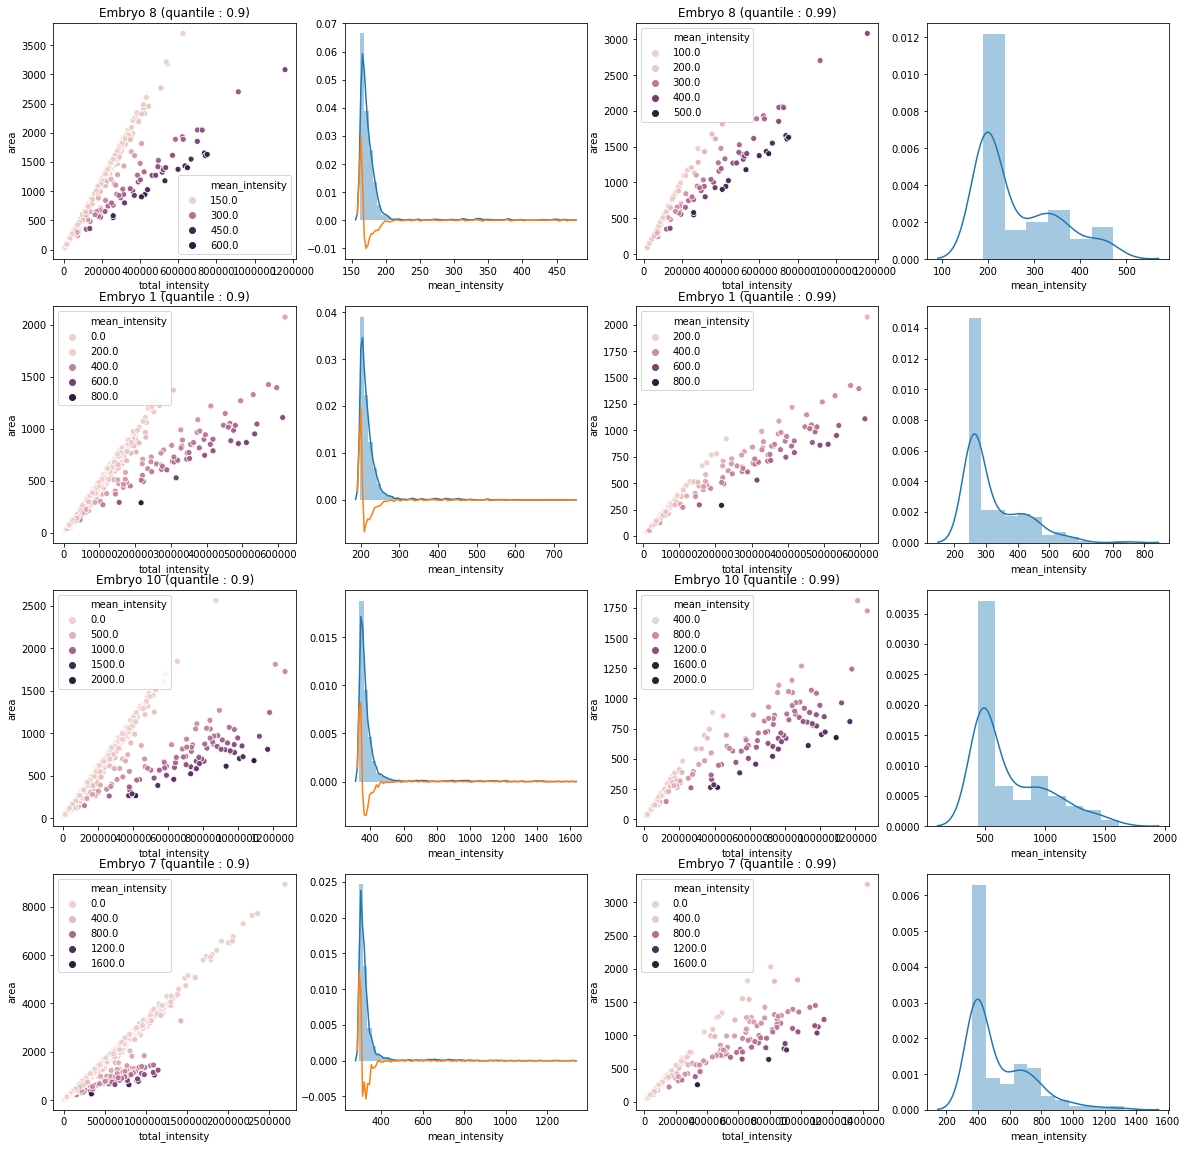

In [90]:
from scipy.signal import find_peaks
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

fig, ax = plt.subplots(4, 4, figsize=[20,20])
i=0
for emb, ds in dataset.items():
    #Get values
    #X = ds[['area','total_intensity']]
    X=ds
    
    X.index.map(int)
    
    X_plt = X.copy()
    #Normalize and center data    
    

     # Test 1
    quant = 0.9
    data = X[X["mean_intensity"] > X["mean_intensity"].quantile(quant)]
    test = data["mean_intensity"]
    print("last {}% :{}".format(round((1-quant)*100,3),len(test)))
    scat = sns.scatterplot(hue="mean_intensity", x='total_intensity', y="area", data=data, ax=ax[i][0])
    scat.set_title("Embryo {} (quantile : {})".format(emb, quant))
    kde = sns.distplot(test, ax=ax[i][1])
    data = kde.get_lines()[0].get_data()
    diff = np.diff(data[1])
    print(len(data[0][1:]))
    print(len(diff))
    sns.lineplot(x = data[0][1:], y=diff, ax=ax[i][1])


    
    # Test 2
    quant = 0.99
    data = X[X["mean_intensity"] > X["mean_intensity"].quantile(quant)]
    test = data["mean_intensity"]
    print("last {}% :{}".format(round((1-quant)*100,3), len(test)))
    sns.distplot(test, ax=ax[i][3])
    sns.scatterplot(hue="mean_intensity", x='total_intensity', y="area", data=data, ax=ax[i][2]).set_title("Embryo {} (quantile : {})".format(emb, quant))
    
    i+=1
    
plt.show()


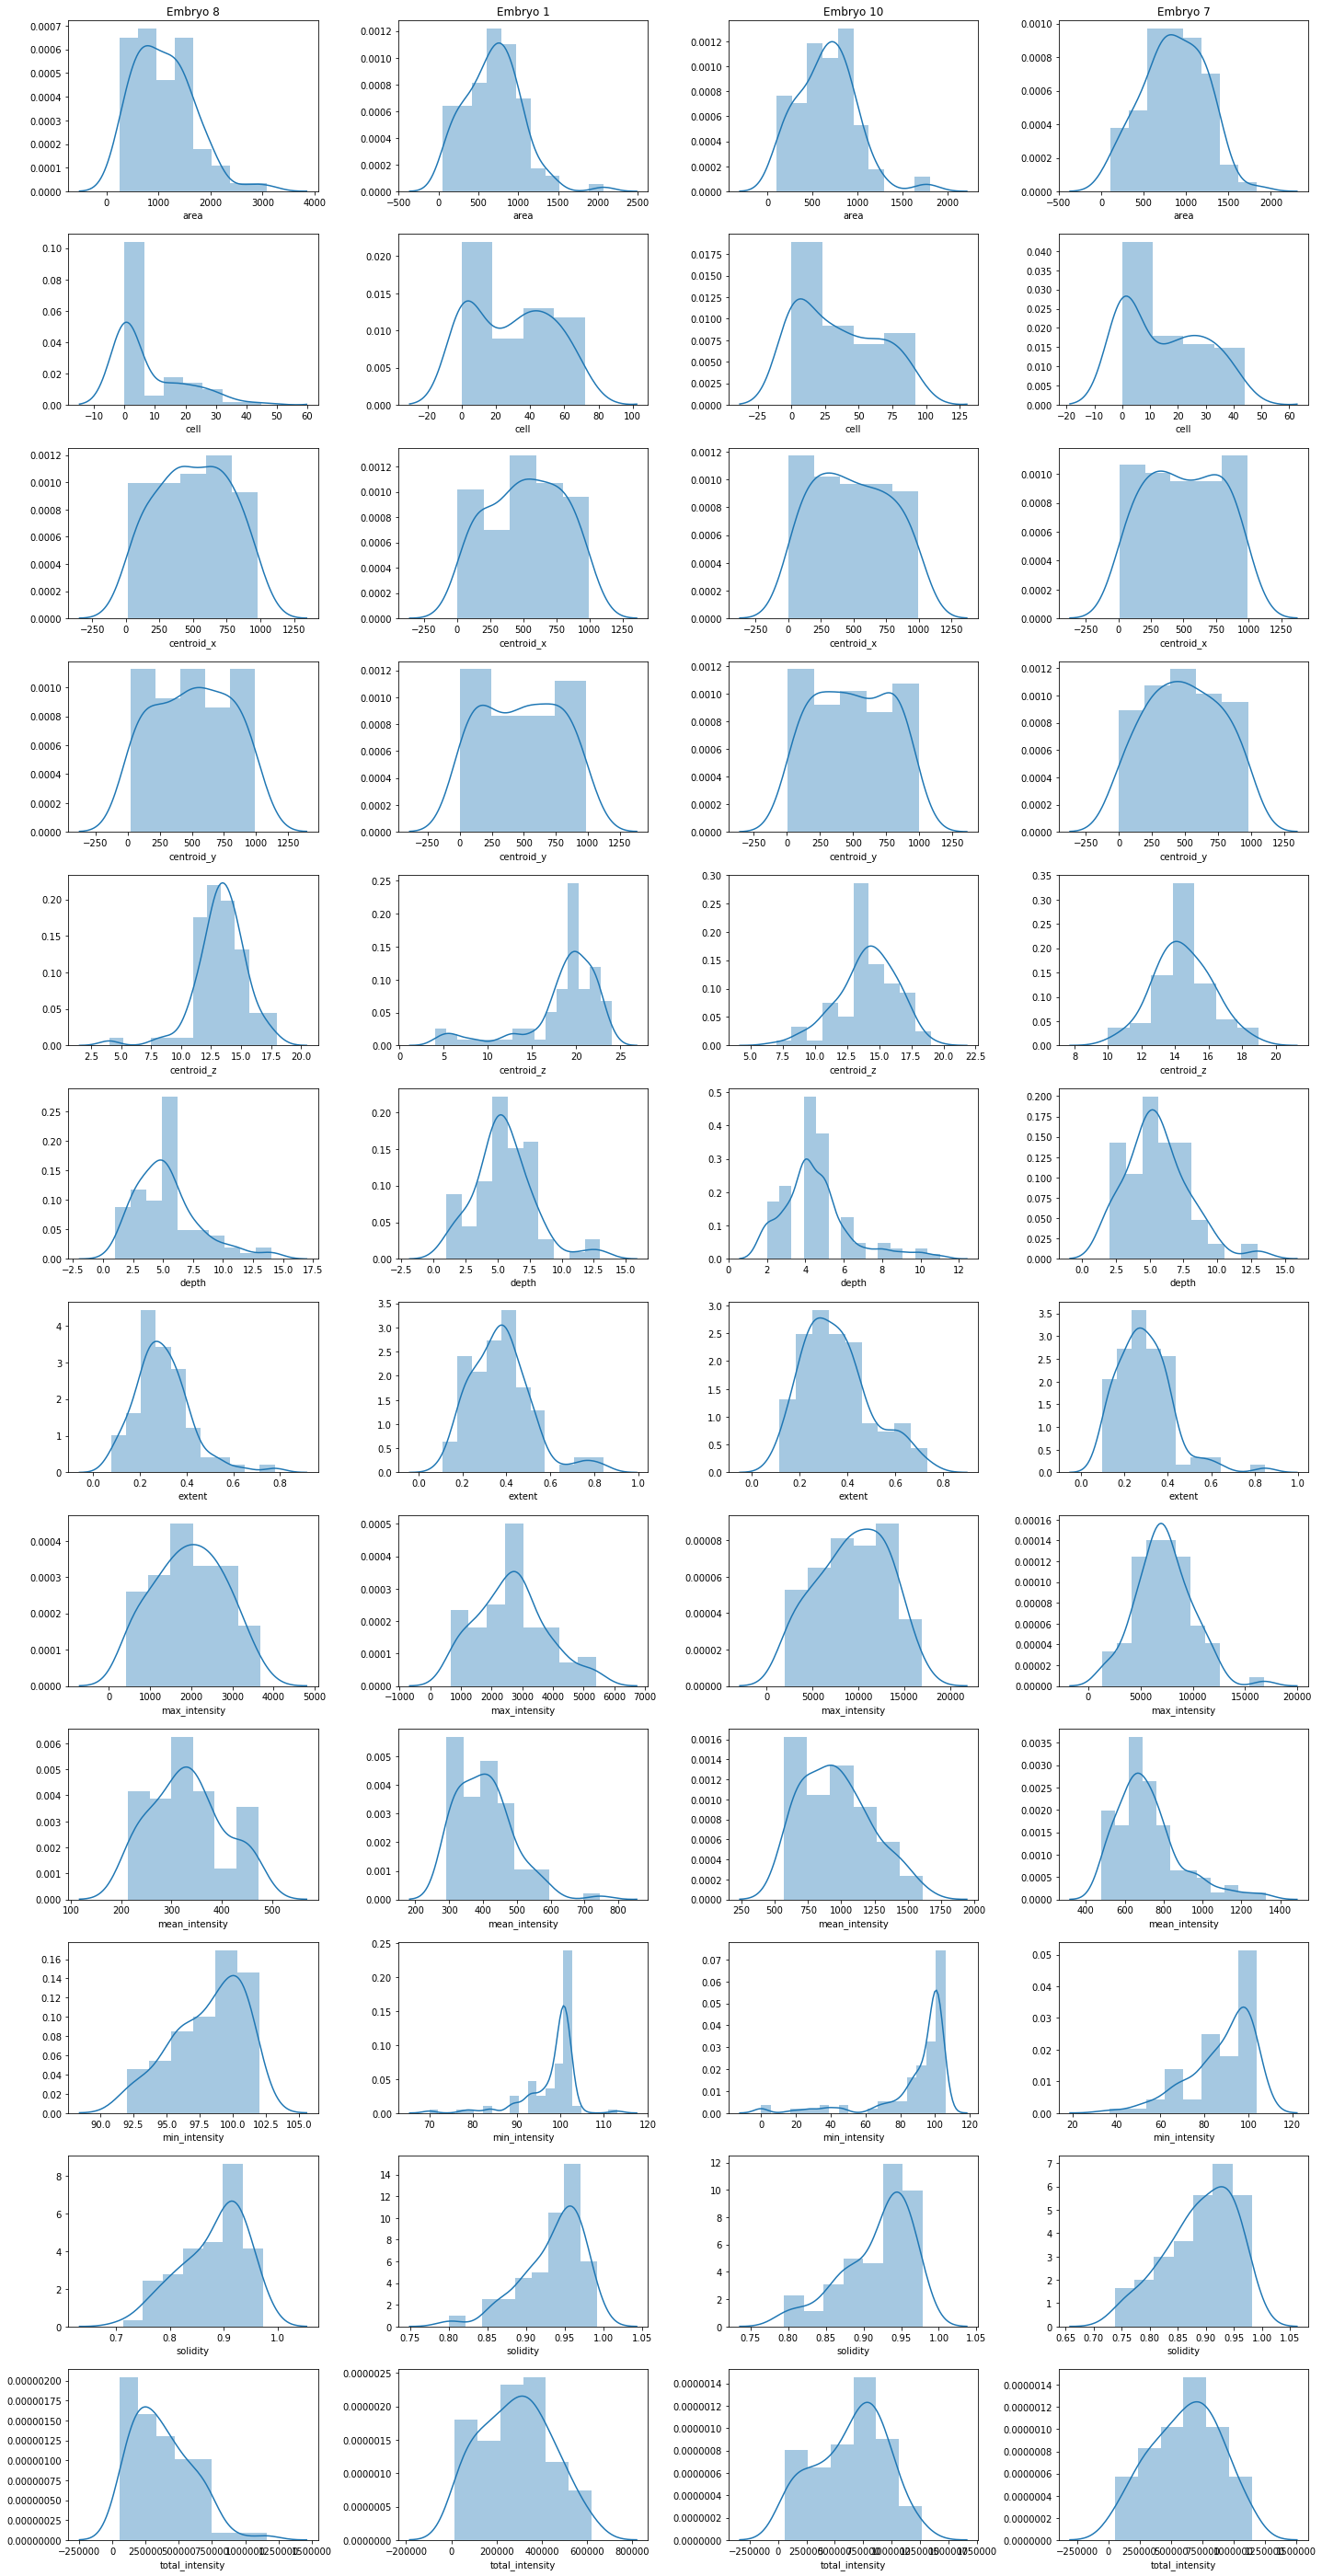

In [113]:
from scripts.classifiers import tail_filter

fig, axs = plt.subplots(len(dataset[1].columns)-1,len(dataset), figsize=[5*len(dataset),3*len(dataset[1].columns)])
ax_i=0
for i, emb in dataset.items():
    emb = tail_filter(emb)
    for j, col in enumerate(emb.columns):
        if col != "is_in_cell":
            ax = axs[j][ax_i]
            if j == 0:
                sns.distplot(emb[col], ax = ax).set_title("Embryo {}".format(i))
            else:
                sns.distplot(emb[col], ax = ax)

    ax_i+=1
plt.tight_layout()
